In [239]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [280]:
pge_df = pd.read_csv('Hourly_Energy_Demand/Demand_for_California_Independent_System_Operator_(CISO)_Pacific_Gas_and_Electric_hourly_-_local_time.csv', skiprows = 4)


In [241]:
pge_df.columns = ('Time', 'Electricity_Demand_(MW-h)')

In [242]:
pge_df

,Time,Electricity_Demand_(MW-h)
0,10/15/19 00:00 -0700,9829
1,10/14/19 23:00 -0700,10555
2,10/14/19 22:00 -0700,11416
3,10/14/19 21:00 -0700,12119
4,10/14/19 20:00 -0700,12546
...,...,...
11151,07/01/18 05:00 -0700,10644
11152,07/01/18 04:00 -0700,10822
11153,07/01/18 03:00 -0700,11200
11154,07/01/18 02:00 -0700,11745


In [243]:
new_time = []

for index, rows in pge_df['Time'].iteritems():
    if ' -0700' in rows:
        new_time.append(rows.replace('-0700', ''))
    elif ' -0800' in rows:
        new_time.append(rows.replace('-0800', ''))

In [244]:
pge_df['Time'] = pd.Series(new_time)

In [245]:
pge_df

,Time,Electricity_Demand_(MW-h)
0,10/15/19 00:00,9829
1,10/14/19 23:00,10555
2,10/14/19 22:00,11416
3,10/14/19 21:00,12119
4,10/14/19 20:00,12546
...,...,...
11151,07/01/18 05:00,10644
11152,07/01/18 04:00,10822
11153,07/01/18 03:00,11200
11154,07/01/18 02:00,11745


In [246]:
def to_datetime(time_series):

    time_list = []

    for index, rows in time_series.iteritems():
        rows = rows.strip()
        time_list.append(dt.datetime.strptime(rows, '%m/%d/%y %H:%M'))
    
    hours = pd.Series(time_list).dt.hour
    days = pd.Series(time_list).dt.day
    date = pd.Series(time_list).dt.date
    
    return time_list, hours, days, date

In [247]:
pge_time, pge_hours, pge_days, pge_date = to_datetime(pge_df['Time'])

In [248]:
pge_df['Time'] = pge_time

In [249]:
pge_df

,Time,Electricity_Demand_(MW-h)
0,2019-10-15 00:00:00,9829
1,2019-10-14 23:00:00,10555
2,2019-10-14 22:00:00,11416
3,2019-10-14 21:00:00,12119
4,2019-10-14 20:00:00,12546
...,...,...
11151,2018-07-01 05:00:00,10644
11152,2018-07-01 04:00:00,10822
11153,2018-07-01 03:00:00,11200
11154,2018-07-01 02:00:00,11745


In [250]:
pge_df.insert(1, column = 'Date', value = pge_date)
pge_df.insert(2, column = 'Day', value = pge_days)
pge_df.insert(3, column = 'Hour', value = pge_hours)

In [251]:
pge_df

,Time,Date,Day,Hour,Electricity_Demand_(MW-h)
0,2019-10-15 00:00:00,2019-10-15,15,0,9829
1,2019-10-14 23:00:00,2019-10-14,14,23,10555
2,2019-10-14 22:00:00,2019-10-14,14,22,11416
3,2019-10-14 21:00:00,2019-10-14,14,21,12119
4,2019-10-14 20:00:00,2019-10-14,14,20,12546
...,...,...,...,...,...
11151,2018-07-01 05:00:00,2018-07-01,1,5,10644
11152,2018-07-01 04:00:00,2018-07-01,1,4,10822
11153,2018-07-01 03:00:00,2018-07-01,1,3,11200
11154,2018-07-01 02:00:00,2018-07-01,1,2,11745


In [252]:
pge_df_day = pge_df.groupby(['Date']).agg({'Electricity_Demand_(MW-h)': 'sum'}).reset_index()



In [253]:
pge_df_day = pge_df_day.drop([469])

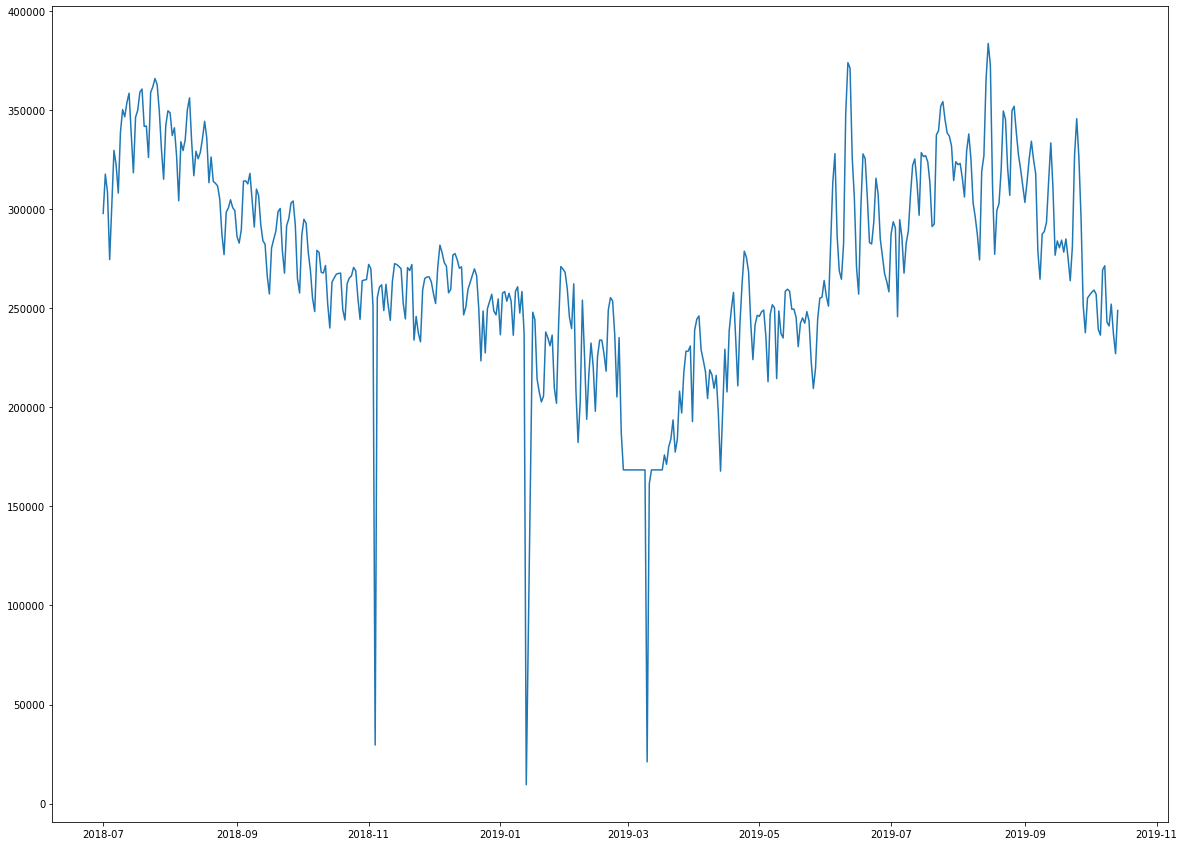

In [351]:
plt.figure(figsize=(20,15))
plt.plot(pge_df_day['Date'], pge_df_day['Electricity_Demand_(MW-h)'])

## Household Hourly Load Profile

In [321]:
sf_house = pd.read_csv('Residential_Hourly_Load_Profiles/USA_CA_San.Francisco.724940_TMY2.csv')


In [322]:
sf_new_date = []

for index, rows in sf_house['Date/Time'].iteritems():
    rows = rows.strip()
    rows = rows[:5] + '/18' + rows[5:]
    if rows[10:12] == '24':
        split_rows = rows.split('  ')
        split_rows[1] = split_rows[1].replace('24','00')
        new_rows = split_rows[0] + ' ' + split_rows[1]
        sf_new_date.append(dt.datetime.strptime(new_rows, '%m/%d/%y %H:%M:%S'))
        continue
    sf_new_date.append(dt.datetime.strptime(rows, '%m/%d/%y %H:%M:%S'))
        

In [327]:
sf_new_date[0]

datetime.datetime(2018, 1, 1, 1, 0)

In [336]:
sf_corr_date = []

for i in sf_new_date:
    if i.hour == 0:
        i += dt.timedelta(days = 1)
        sf_corr_date.append(i)
    else:
        sf_corr_date.append(i)

In [338]:
sf_house['Date/Time'] = sf_corr_date

In [339]:
sf_hours = pd.Series(sf_house['Date/Time']).dt.hour
sf_days = pd.Series(sf_house['Date/Time']).dt.day
sf_date = pd.Series(sf_house['Date/Time']).dt.date

In [341]:
sf_house.insert(1, column = 'Date', value = sf_date)
sf_house.insert(2, column = 'Day', value = sf_days)
sf_house.insert(3, column = 'Hour', value = sf_hours)

In [342]:
sf_house

,Date/Time,Date,Day,Hour,Electricity:Facility [kWh](Hourly),Gas:Facility [kWh](Hourly),Heating:Electricity [kWh](Hourly),Heating:Gas [kWh](Hourly),HVACFan:Fans:Electricity [kWh](Hourly),Electricity:HVAC [kWh](Hourly),Fans:Electricity [kWh](Hourly),General:InteriorLights:Electricity [kWh](Hourly),General:ExteriorLights:Electricity [kWh](Hourly),Appl:InteriorEquipment:Electricity [kWh](Hourly),Misc:InteriorEquipment:Electricity [kWh](Hourly),Water Heater:WaterSystems:Gas [kWh](Hourly)
0,2018-01-01 01:00:00,2018-01-01,1,1,0.770711,4.785919,0.0,4.394272,0.117659,0.117659,0.117659,0.132992,0.027554,0.092943,0.384215,0.365182
1,2018-01-01 02:00:00,2018-01-01,1,2,0.667992,5.130979,0.0,4.819529,0.129045,0.129045,0.129045,0.077579,0.016073,0.076186,0.353760,0.287081
2,2018-01-01 03:00:00,2018-01-01,1,3,0.633996,5.509699,0.0,5.220016,0.139768,0.139768,0.139768,0.055413,0.011481,0.062327,0.349659,0.265598
3,2018-01-01 04:00:00,2018-01-01,1,4,0.622841,5.594449,0.0,5.299085,0.141886,0.141886,0.141886,0.055413,0.011481,0.053976,0.344737,0.271617
4,2018-01-01 05:00:00,2018-01-01,1,5,0.631621,6.028581,0.0,5.670921,0.151842,0.151842,0.151842,0.055413,0.011481,0.065823,0.331715,0.334810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 20:00:00,2018-12-31,31,20,1.769462,1.760011,0.0,0.673371,0.018030,0.018030,0.018030,0.642030,0.133021,0.349591,0.611442,1.044522
8756,2018-12-31 21:00:00,2018-12-31,31,21,1.697152,2.236630,0.0,1.223519,0.032760,0.032760,0.032760,0.584706,0.121145,0.310731,0.632462,0.969544
8757,2018-12-31 22:00:00,2018-12-31,31,22,1.559757,2.317366,0.0,1.405534,0.037634,0.037634,0.037634,0.492987,0.102141,0.293949,0.617697,0.869283
8758,2018-12-31 23:00:00,2018-12-31,31,23,1.291647,3.169174,0.0,2.416438,0.064701,0.064701,0.064701,0.366874,0.076012,0.234174,0.534537,0.715915


In [343]:
sf_house.columns

Index(['Date/Time', 'Date', 'Day', 'Hour',
       'Electricity:Facility [kWh](Hourly)', 'Gas:Facility [kWh](Hourly)',
       'Heating:Electricity [kWh](Hourly)', 'Heating:Gas [kWh](Hourly)',
       'HVACFan:Fans:Electricity [kWh](Hourly)',
       'Electricity:HVAC [kWh](Hourly)', 'Fans:Electricity [kWh](Hourly)',
       'General:InteriorLights:Electricity [kWh](Hourly)',
       'General:ExteriorLights:Electricity [kWh](Hourly)',
       'Appl:InteriorEquipment:Electricity [kWh](Hourly)',
       'Misc:InteriorEquipment:Electricity [kWh](Hourly)',
       'Water Heater:WaterSystems:Gas [kWh](Hourly) '],
      dtype='object')

In [344]:
sf_house_day = sf_house.groupby(['Date']).agg({
    'Electricity:Facility [kWh](Hourly)': 'sum',
    'Gas:Facility [kWh](Hourly)': 'sum',
    'Heating:Electricity [kWh](Hourly)': 'sum',
    'Heating:Gas [kWh](Hourly)': 'sum',
    'HVACFan:Fans:Electricity [kWh](Hourly)': 'sum',
    'Electricity:HVAC [kWh](Hourly)': 'sum',
    'Fans:Electricity [kWh](Hourly)': 'sum',
    'General:InteriorLights:Electricity [kWh](Hourly)': 'sum',
    'General:ExteriorLights:Electricity [kWh](Hourly)': 'sum',
    'Appl:InteriorEquipment:Electricity [kWh](Hourly)': 'sum',
    'Misc:InteriorEquipment:Electricity [kWh](Hourly)': 'sum',
    'Water Heater:WaterSystems:Gas [kWh](Hourly) ': 'sum'}).reset_index()

In [345]:
sf_house_day

,Date,Electricity:Facility [kWh](Hourly),Gas:Facility [kWh](Hourly),Heating:Electricity [kWh](Hourly),Heating:Gas [kWh](Hourly),HVACFan:Fans:Electricity [kWh](Hourly),Electricity:HVAC [kWh](Hourly),Fans:Electricity [kWh](Hourly),General:InteriorLights:Electricity [kWh](Hourly),General:ExteriorLights:Electricity [kWh](Hourly),Appl:InteriorEquipment:Electricity [kWh](Hourly),Misc:InteriorEquipment:Electricity [kWh](Hourly),Water Heater:WaterSystems:Gas [kWh](Hourly)
0,2018-01-01,24.981173,99.706252,0.0,81.249861,2.175503,2.175503,2.175503,5.308596,1.099881,6.209764,9.789424,17.782058
1,2018-01-02,25.750801,116.567540,0.0,98.829263,2.646200,2.646200,2.646200,5.563497,1.152694,5.721130,10.253927,17.031947
2,2018-01-03,25.046949,90.828374,0.0,73.122264,1.957883,1.957883,1.957883,5.563497,1.152694,5.705595,10.253927,16.999781
3,2018-01-04,24.954269,87.370745,0.0,69.660880,1.865203,1.865203,1.865203,5.563497,1.152694,5.705595,10.253927,17.003535
4,2018-01-05,24.548162,72.209772,0.0,54.493751,1.459096,1.459096,1.459096,5.563497,1.152694,5.705595,10.253927,17.009691
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2018-12-28,25.469824,98.708594,0.0,81.041545,2.169926,2.169926,2.169926,5.738145,1.188879,5.705595,10.253927,16.960720
362,2018-12-29,24.984116,80.576580,0.0,62.901504,1.684217,1.684217,1.684217,5.738145,1.188879,5.705595,10.253927,16.968746
363,2018-12-30,25.897892,92.104424,0.0,73.123036,1.957904,1.957904,1.957904,5.738145,1.188879,6.345685,10.253927,18.275059
364,2018-12-31,25.231211,66.664679,0.0,47.643928,1.275689,1.275689,1.275689,5.738145,1.188879,6.361219,10.253927,18.314421


No handles with labels found to put in legend.


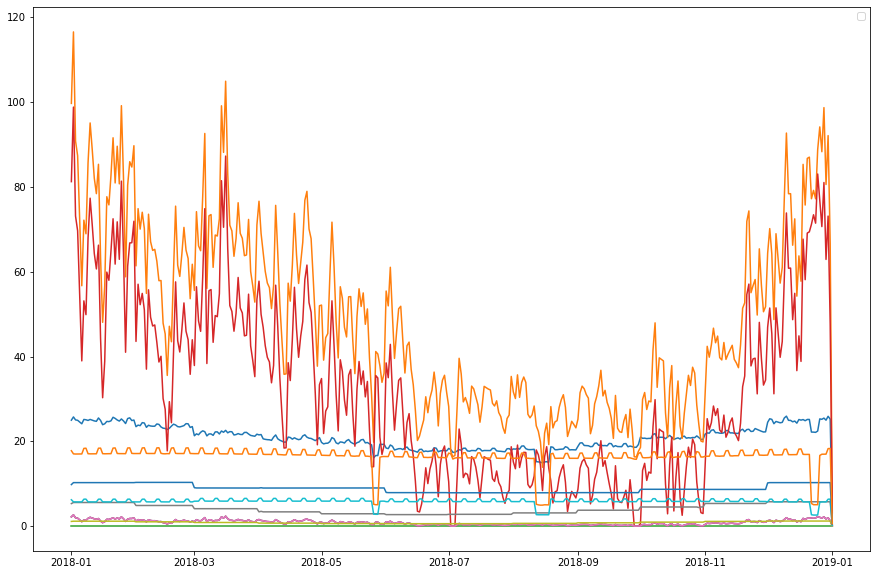

In [354]:
plt.figure(figsize=(15,10))
plt.plot(sf_house_day['Date'], sf_house_day['Electricity:Facility [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['Gas:Facility [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['Heating:Electricity [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['Heating:Gas [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['HVACFan:Fans:Electricity [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['Electricity:HVAC [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['Fans:Electricity [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['General:InteriorLights:Electricity [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['General:ExteriorLights:Electricity [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['Appl:InteriorEquipment:Electricity [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['Misc:InteriorEquipment:Electricity [kWh](Hourly)'])
plt.plot(sf_house_day['Date'], sf_house_day['Water Heater:WaterSystems:Gas [kWh](Hourly) '])
plt.legend()